In [1]:
import numpy as np 
import pandas as pd 
import os,random
import tensorflow as tf

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2
import glob

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd "/content/drive/MyDrive/Hackathon"

/content/drive/MyDrive/Hackathon


In [5]:
train=pd.read_csv("train (1).csv")

In [6]:
path="/train/"

In [7]:
train["path"]=train["file_id"].apply(lambda x:"train/"+str(x).strip()+".jpg")

In [8]:
train.head()

,file_id,label,path
0,0,0,train/0.jpg
1,1,0,train/1.jpg
2,2,0,train/2.jpg
3,3,0,train/3.jpg
4,4,0,train/4.jpg


In [9]:
test=pd.read_csv("test.csv")

In [10]:
test["path"]=test["file_id"].apply(lambda x:"test/"+str(x).strip()+".jpg")

In [11]:
test.head()

,file_id,path
0,0,test/0.jpg
1,1,test/1.jpg
2,2,test/2.jpg
3,3,test/3.jpg
4,4,test/4.jpg


In [12]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(train, test_size=0.2, random_state=10)

In [13]:
train_df.reset_index(drop=True,inplace=True)
test_df.reset_index(drop=True,inplace=True)

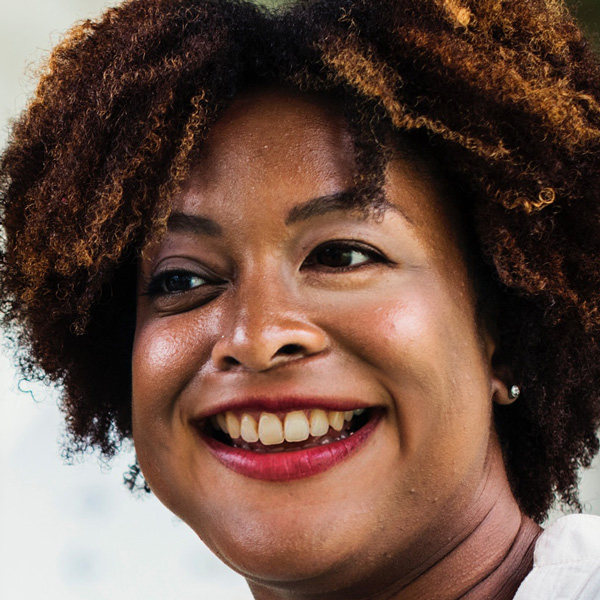

In [14]:
image_file="train/87.jpg"
image = tf.keras.preprocessing.image.load_img(image_file)
image

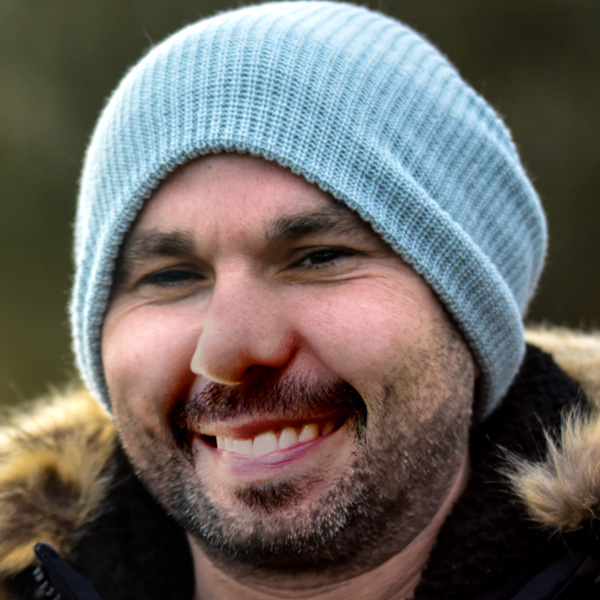

In [15]:
image_file="test/87.jpg"
image = tf.keras.preprocessing.image.load_img(image_file)
image

In [16]:
img_size=200
img_depth=3

In [17]:
 image =  tf.keras.preprocessing.image.load_img(train_df["path"][0],
                                                                  target_size=(img_size, img_size))
            #Convert to array
image = tf.keras.preprocessing.image.img_to_array(image)
            

In [18]:
image

array([[[ 82.,  96.,  43.],
        [ 78.,  92.,  43.],
        [ 73.,  86.,  42.],
        ...,
        [191., 173., 133.],
        [139., 120., 103.],
        [152., 146., 110.]],

       [[113., 123.,  63.],
        [108., 117.,  60.],
        [103., 112.,  57.],
        ...,
        [ 80.,  76.,  49.],
        [ 62.,  54.,  51.],
        [ 76.,  82.,  48.]],

       [[116., 124.,  64.],
        [117., 125.,  66.],
        [122., 130.,  71.],
        ...,
        [ 77.,  72.,  52.],
        [ 73.,  67.,  51.],
        [ 76.,  79.,  50.]],

       ...,

       [[ 26.,  24.,  25.],
        [ 28.,  26.,  27.],
        [ 26.,  24.,  25.],
        ...,
        [ 99., 131.,  68.],
        [106., 138.,  75.],
        [ 93., 124.,  64.]],

       [[ 28.,  26.,  27.],
        [ 29.,  27.,  28.],
        [ 26.,  24.,  25.],
        ...,
        [104., 138.,  78.],
        [ 91., 125.,  65.],
        [ 89., 123.,  63.]],

       [[ 31.,  29.,  30.],
        [ 31.,  29.,  30.],
        [ 29.,  

In [19]:
class_names=train["label"].unique()

In [20]:
def batch_generator(df, batchsize=32):   
    
    while True:       
                
        #Generate random numbers to pick images from dataset
        batch_nums = np.random.randint(0,df.shape[0], batchsize)
        
        #Initialize batch images array
        batch_images = np.zeros((batchsize,img_size, img_size,img_depth))
        
        #Initiate batch label array
        batch_labels = np.zeros((batchsize, len(class_names)))
        
        for i in range(batchsize):
            
            #Load image
            image =  tf.keras.preprocessing.image.load_img(df.loc[batch_nums[i]]["path"],
                                                                  target_size=(img_size, img_size))
            #Convert to array
            image = tf.keras.preprocessing.image.img_to_array(image)
            
            #Get the class
            img_class = df.loc[batch_nums[i]]['label']
            #Convert class to one hot encoding
            img_class = tf.keras.utils.to_categorical(img_class, num_classes=len(class_names))
            
            #Update batch images and class arrays
            batch_images[i] = image
            batch_labels[i] = img_class        
        
        yield batch_images, batch_labels

In [21]:
train_df

,file_id,label,path
0,16,0,train/16.jpg
1,304,0,train/304.jpg
2,1378,1,train/1378.jpg
3,1129,1,train/1129.jpg
4,1114,1,train/1114.jpg
...,...,...,...
1362,1393,1,train/1393.jpg
1363,1344,1,train/1344.jpg
1364,527,0,train/527.jpg
1365,1149,1,train/1149.jpg


In [22]:
test_df

,file_id,label,path
0,1553,1,train/1553.jpg
1,1313,1,train/1313.jpg
2,1046,1,train/1046.jpg
3,845,1,train/845.jpg
4,267,0,train/267.jpg
...,...,...,...
337,596,0,train/596.jpg
338,786,1,train/786.jpg
339,941,1,train/941.jpg
340,1490,1,train/1490.jpg


In [23]:

from keras.models import Sequential 
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from keras.preprocessing.image import ImageDataGenerator

In [ ]:

model = Sequential()

model.add(Conv2D(32,(3,3),input_shape = (200,200,3),activation = 'relu',padding='same',))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 50, 50, 128)      

In [ ]:
batchsize=32
train_generator=batch_generator(train_df,batchsize=batchsize)
test_generator=batch_generator(test_df,batchsize=batchsize)

In [ ]:
model.fit_generator(train_generator, 
                          epochs=10,
                          steps_per_epoch= train_df.shape[0]//batchsize,
                          validation_data=test_generator,
                          validation_steps = test_df.shape[0]//batchsize)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
 1/42 [..............................] - ETA: 2:57 - loss: 38.8395 - accuracy: 0.5625

KeyboardInterrupt: ignored

In [ ]:
def testproc(df):
  t=pd.DataFrame()
  for i in range(len(test)):
            
            #Load image
            image =  tf.keras.preprocessing.image.load_img(df.loc[i]["path"],
                                                                  target_size=(img_size, img_size,3))
            #Convert to array
            image = tf.keras.preprocessing.image.img_to_array(image)
            t=t.append(image)
  return t

In [ ]:
t=pd.DataFrame()
pred=[]
for i in range(len(test)):
          
            #Load image
          image =  tf.keras.preprocessing.image.load_img(test.loc[i]["path"],
                                                                  target_size=(img_size, img_size,3))
            #Convert to array

          image = tf.keras.preprocessing.image.img_to_array(image)
          image = np.expand_dims(image, axis = 0)
          pred.append(np.argmax(model.predict(image)))

In [ ]:
len(pred)

332

In [ ]:
sample=pd.read_csv("sample_submission.csv")

In [ ]:
sample["label"]=pred

In [ ]:
sample.to_csv("pred_cnn1.csv",index=False)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
img_size=150
img_depth=3

In [ ]:
model=tf.keras.applications.InceptionV3 (input_shape=(150,150,3),
    include_top=False,
    weights="imagenet"
)

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
for layer in model.layers:
  layer.trainable=True

In [ ]:

x = tf.keras.layers.Flatten()(model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = tf.keras.layers.Dense(1024, activation='relu')(x)

# Add a dropout rate of 0.5
x = tf.keras.layers.Dropout(0.7)(x)

# Add a final sigmoid layer for classification
x = tf.keras.layers.Dense(2, activation='softmax')(x)

model = tf.keras.models.Model(model.input, x)


In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
checkpoint_filepath='CNN last.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'

In [ ]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
batchsize=32
train_generator=batch_generator(train_df,batchsize=batchsize)
test_generator=batch_generator(test_df,batchsize=batchsize)

In [ ]:
model.fit_generator(train_generator, 
                          epochs=50,
                          steps_per_epoch= train_df.shape[0]//batchsize,
                          validation_data=test_generator,
                          validation_steps = test_df.shape[0]//batchsize, callbacks=[model_checkpoint_callback])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
42/42 [==============================] - 394s 9s/step - loss: 1.8840 - accuracy: 0.6070 - val_loss: 1.4564 - val_accuracy: 0.5656
Epoch 2/50
42/42 [==============================] - 148s 4s/step - loss: 0.8312 - accuracy: 0.6581 - val_loss: 1.4460 - val_accuracy: 0.5656
Epoch 3/50
42/42 [==============================] - 60s 1s/step - loss: 0.4405 - accuracy: 0.8168 - val_loss: 1.5596 - val_accuracy: 0.6375
Epoch 4/50
42/42 [==============================] - 41s 988ms/step - loss: 0.2931 - accuracy: 0.8803 - val_loss: 1.7033 - val_accuracy: 0.6250
Epoch 5/50
42/42 [==============================] - 28s 677ms/step - loss: 0.2069 - accuracy: 0.9286 - val_loss: 2.3979 - val_accuracy: 0.6094
Epoch 6/50
42/42 [==============================] - 24s 577ms/step - loss: 0.1747 - accuracy: 0.9449 - val_loss: 3.0109 - val_accuracy: 0.6781
Epoch 7/50
42/42 [==============================] - 22s 541ms/step - loss: 0.1640 - accuracy: 0.9607 - val_loss: 2.4831 - val_accuracy: 0.6781
Epoch 

In [ ]:
model.load_weights("CNN last.epoch39-loss2.01.hdf5")

In [ ]:
def testproc(df):
  t=pd.DataFrame()
  for i in range(len(test)):
            
            #Load image
            image =  tf.keras.preprocessing.image.load_img(df.loc[i]["path"],
                                                                  target_size=(img_size, img_size,3))
            #Convert to array
            image = tf.keras.preprocessing.image.img_to_array(image)
            t=t.append(image)
  return t

In [ ]:
t=pd.DataFrame()
pred=[]
for i in range(len(test)):
          
            #Load image
          image =  tf.keras.preprocessing.image.load_img(test.loc[i]["path"],
                                                                  target_size=(img_size, img_size,3))
            #Convert to array

          image = tf.keras.preprocessing.image.img_to_array(image)
          image = np.expand_dims(image, axis = 0)
          pred.append(np.argmax(model.predict(image)))

In [ ]:
len(pred)

332

In [ ]:
sample=pd.read_csv("sample_submission.csv")

In [ ]:
sample["label"]=pred

In [ ]:
sample.to_csv("pred_cnn2.csv",index=False)

In [ ]:
from keras.applications.resnet_v2 import ResNet50V2

In [ ]:
img_size = 200
img_depth = 3

In [ ]:
model=tf.keras.applications.ResNet50V2 (input_shape=(200,200,3),include_top=False,weights="imagenet")

94674944/94668760 [==============================] - 2s 0us/step


In [ ]:
model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 206, 206, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 100, 100, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 102, 102, 64) 0           conv1_conv[0][0]                 
_________________________________________________________________________________________

In [ ]:
for layer in model.layers:
  layer.trainable=True

In [ ]:

x = tf.keras.layers.Flatten()(model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = tf.keras.layers.Dense(1024, activation='relu')(x)

# Add a dropout rate of 0.7
x = tf.keras.layers.Dropout(0.7)(x)

# Add a final sigmoid layer for classification
x = tf.keras.layers.Dense(2, activation='softmax')(x)

model = tf.keras.models.Model(model.input, x)


In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
checkpoint_filepath='CNN last.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'

In [ ]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
batchsize=32
train_generator=batch_generator(train_df,batchsize=batchsize)
test_generator=batch_generator(test_df,batchsize=batchsize)

In [ ]:
model.fit_generator(train_generator, 
                          epochs=100,
                          steps_per_epoch= train_df.shape[0]//batchsize,
                          validation_data=test_generator,
                          validation_steps = test_df.shape[0]//batchsize, callbacks=[model_checkpoint_callback])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
42/42 [==============================] - 691s 16s/step - loss: 1.7118 - accuracy: 0.5552 - val_loss: 0.8902 - val_accuracy: 0.6187
Epoch 2/100
42/42 [==============================] - 266s 6s/step - loss: 0.9127 - accuracy: 0.7241 - val_loss: 1.0618 - val_accuracy: 0.5938
Epoch 3/100
42/42 [==============================] - 112s 3s/step - loss: 0.5468 - accuracy: 0.8039 - val_loss: 0.7704 - val_accuracy: 0.6406
Epoch 4/100
42/42 [==============================] - 63s 2s/step - loss: 0.4309 - accuracy: 0.8637 - val_loss: 0.8582 - val_accuracy: 0.6313
Epoch 5/100
42/42 [==============================] - 45s 1s/step - loss: 0.3036 - accuracy: 0.8846 - val_loss: 1.0417 - val_accuracy: 0.6313
Epoch 6/100
42/42 [==============================] - 38s 913ms/step - loss: 0.2136 - accuracy: 0.9236 - val_loss: 0.9905 - val_accuracy: 0.6344
Epoch 7/100
42/42 [==============================] - 34s 823ms/step - loss: 0.1679 - accuracy: 0.9410 - val_loss: 1.1696 - val_accuracy: 0.6344
Epo

In [ ]:
model.load_weights("CNN last.epoch18-loss1.22.hdf5")

In [ ]:
def testproc(df):
  t=pd.DataFrame()
  for i in range(len(test)):
            
            #Load image
            image =  tf.keras.preprocessing.image.load_img(df.loc[i]["path"],
                                                                  target_size=(img_size, img_size,3))
            #Convert to array
            image = tf.keras.preprocessing.image.img_to_array(image)
            t=t.append(image)
  return t

In [ ]:
t=pd.DataFrame()
pred=[]
for i in range(len(test)):
          
            #Load image
          image =  tf.keras.preprocessing.image.load_img(test.loc[i]["path"],
                                                                  target_size=(img_size, img_size,3))
            #Convert to array

          image = tf.keras.preprocessing.image.img_to_array(image)
          image = np.expand_dims(image, axis = 0)
          pred.append(np.argmax(model.predict(image)))

In [ ]:
len(pred)

332

In [ ]:
sample=pd.read_csv("sample_submission.csv")

In [ ]:
sample['label'] = pred

In [ ]:
sample.to_csv("pred_cnn5.csv",index=False)

In [37]:
!pip install -U efficientnet

     |████████████████████████████████| 51kB 4.8MB/s 


In [131]:
import efficientnet.keras as efn

In [132]:
img_size = 200
img_depth = 3

In [133]:
model = efn.EfficientNetB7(input_shape = (200, 200, 3), include_top = False, weights = 'imagenet')

In [134]:
model.summary()

Model: "efficientnet-b7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 100, 100, 64) 1728        input_9[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 100, 100, 64) 256         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 100, 100, 64) 0           stem_bn[0][0]                    
____________________________________________________________________________________

In [135]:
for layer in model.layers:
  layer.trainable=True

In [136]:
from tensorflow.keras.optimizers import RMSprop
x = tf.keras.layers.Flatten()(model.output)
x = tf.keras.layers.Dense(1024, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
predictions = tf.keras.layers.Dense(2, activation="softmax")(x)
model = tf.keras.models.Model(model.input, predictions)


In [137]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6),loss='binary_crossentropy',metrics=['accuracy'])
#model.compile(optimizer=optimizers.rmsprop(lr=0.0001, decay=1e-6),loss='categorical_crossentropy',metrics=['accuracy'])


In [138]:
checkpoint_filepath='CNN last.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'

In [139]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [140]:
batchsize=32
train_generator=batch_generator(train_df,batchsize=batchsize)
test_generator=batch_generator(test_df,batchsize=batchsize)

In [141]:
model.fit_generator(train_generator, 
                          epochs=100,
                          steps_per_epoch= train_df.shape[0]//batchsize,
                          validation_data=test_generator,
                          validation_steps = test_df.shape[0]//batchsize, callbacks=[model_checkpoint_callback])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100


ResourceExhaustedError: ignored

In [113]:
model.load_weights("CNN last.epoch51-loss3.01.hdf5")

In [114]:
def testproc(df):
  t=pd.DataFrame()
  for i in range(len(test)):
            
            #Load image
            image =  tf.keras.preprocessing.image.load_img(df.loc[i]["path"],
                                                                  target_size=(img_size, img_size,3))
            #Convert to array
            image = tf.keras.preprocessing.image.img_to_array(image)
            t=t.append(image)
  return t

In [115]:
t=pd.DataFrame()
pred=[]
for i in range(len(test)):
          
            #Load image
          image =  tf.keras.preprocessing.image.load_img(test.loc[i]["path"],
                                                                  target_size=(img_size, img_size,3))
            #Convert to array

          image = tf.keras.preprocessing.image.img_to_array(image)
          image = np.expand_dims(image, axis = 0)
          pred.append(np.argmax(model.predict(image)))

In [116]:
len(pred)

332

In [117]:
sample=pd.read_csv("sample_submission.csv")

In [118]:
sample['label'] = pred

In [119]:
sample.to_csv("pred_cnn7.csv",index=False)